In [1]:
import tweepy
import csv
import pandas as pd
import numpy as np

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
consumerKey='RXzVf0QoLzycPCzSyM672LYEr'
consumerSecret='LXJ82qRr6i685209qfTcsRxgzHqYyFdW6O2ee81a9CCSBd3cOV'
accessToken='839494478171947009-uMN3BaDGHRD0RQJPSMtSVVk49HQociR'
accessTokenSecret='uudOqmoknxb1sjrKlTG4UOJIYY4j3OtJz8EUZXjk3kJYp'


In [3]:
search_text = "@realDonaldTrump"
search_number = 3000
callCount = 0

In [4]:
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
twitter = tweepy.API(auth)

In [5]:
try:
    allTweets = []
    new_tweets = twitter.user_timeline(screen_name = search_text, count = search_number, include_rts = True, lang="en")
    allTweets.extend(new_tweets)
    #save the id of the oldest tweet less one
    oldest = allTweets[-1].id - 1
    #keep grabbing tweets until there are no tweets left to grab

    while ((len(new_tweets) > 0) and (len(allTweets) < (int)(search_number))):
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = twitter.user_timeline(screen_name = search_text,count=200,max_id=oldest, lang="en")
        #save most recent tweets
        allTweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = allTweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(allTweets)))
        #transform the tweepy tweets into a 2D array that will populate the csv  
except:
    print("User Handle does not exist: "+search_text)

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...2000 tweets downloaded so far
...2197 tweets downloaded so far
...2397 tweets downloaded so far
...2597 tweets downloaded so far
...2796 tweets downloaded so far
...2996 tweets downloaded so far
...3196 tweets downloaded so far


In [6]:
outTweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8"), tweet.favorite_count, tweet.retweet_count ] for tweet in allTweets]

In [7]:
df = pd.DataFrame(np.array(outTweets).reshape(len(outTweets),5), columns = ['Tweet ID', 'Date and Time', 'Tweet', 'Favorite Count', 'Retweet Count'])


In [8]:
df

,Tweet ID,Date and Time,Tweet,Favorite Count,Retweet Count
0,1029798446650277888,2018-08-15 18:34:17,"b'Chuck Schumer, I agree! https://t.co/KfoLkQU...",9097,3500
1,1029745594540150784,2018-08-15 15:04:16,"b'Our Country was built on Tariffs, and Tariff...",38572,9886
2,1029743849160232960,2018-08-15 14:57:20,b'Happy Birthday to the leader of the Democrat...,45557,10125
3,1029733227404189697,2018-08-15 14:15:07,b'\xe2\x80\x9cThe action (the Strzok firing) w...,35775,9226
4,1029731513573822464,2018-08-15 14:08:18,b'The Rigged Russian Witch Hunt goes on and on...,41936,11018
5,1029727209316069376,2018-08-15 13:51:12,b'My friend and very early supporter Kris Koba...,31974,7112
6,1029724286121074689,2018-08-15 13:39:35,b'It is about time that Connecticut had a real...,34819,8384
7,1029722249232826368,2018-08-15 13:31:30,b'.@PeteStauber won big last night in Minnesot...,28053,6318
8,1029719034756059136,2018-08-15 13:18:43,b'\xe2\x80\x9cPeople who enter the United Stat...,53020,15498
9,1029717928130818048,2018-08-15 13:14:19,b'Congratulations to Bryan Steil on a wonderfu...,28916,6602


In [9]:
df.to_pickle("Tweets.pkl")

## Clean Tweets

In [10]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import pandas as pd

def getListofWords(df):
    wordlist = []
    for index, row in df.iterrows():
        tweet = row['Tweet']
        tweet = str(tweet)[2:-1].lower()
        tweet = tweet.translate(str.maketrans('','',string.punctuation))
        tweet_split = tweet.split(" ")
        for each in tweet_split:
            wordlist.append(each)
    return wordlist
        

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
df = pd.read_pickle('Tweets.pkl')

In [56]:
tweet_words = getListofWords(df)
tweet_no_stop =  [w for w in tweet_words if not w in stop_words]

In [57]:
word_freq = nltk.FreqDist(tweet_no_stop)
del word_freq['rt']
del word_freq['']
del word_freq['amp']
del word_freq['much']
del word_freq['many']
del word_freq['would']

In [58]:
word_freq.most_common(25)

[('great', 553),
 ('people', 215),
 ('us', 193),
 ('news', 187),
 ('thank', 187),
 ('president', 180),
 ('today', 175),
 ('trump', 158),
 ('country', 152),
 ('fake', 150),
 ('big', 149),
 ('tax', 148),
 ('democrats', 141),
 ('realdonaldtrump', 129),
 ('america', 112),
 ('good', 108),
 ('new', 104),
 ('want', 101),
 ('time', 97),
 ('united', 95),
 ('korea', 94),
 ('honor', 93),
 ('house', 91),
 ('north', 91),
 ('one', 90)]

In [59]:
bigrams = nltk.bigrams(tweet_no_stop)
word_freq = nltk.FreqDist(bigrams)

In [60]:
word_freq.most_common(25)

[(('fake', 'news'), 131),
 (('north', 'korea'), 73),
 (('united', 'states'), 69),
 (('tax', 'cuts'), 68),
 (('rt', 'realdonaldtrump'), 64),
 (('great', 'honor'), 56),
 (('rt', 'scavino45'), 52),
 (('white', 'house'), 48),
 (('news', 'media'), 45),
 (('america', 'great'), 41),
 (('witch', 'hunt'), 40),
 (('last', 'night'), 39),
 (('stock', 'market'), 39),
 (('prime', 'minister'), 35),
 (('crooked', 'hillary'), 33),
 (('tax', 'cut'), 29),
 (('new', 'york'), 28),
 (('great', 'state'), 28),
 (('make', 'america'), 27),
 (('puerto', 'rico'), 26),
 (('working', 'hard'), 26),
 (('hillary', 'clinton'), 26),
 (('president', 'trump'), 25),
 (('great', 'job'), 24),
 (('rt', 'foxandfriends'), 24)]

In [61]:
trigrams = nltk.trigrams(tweet_no_stop)
word_freq = nltk.FreqDist(trigrams)

In [62]:
word_freq.most_common(25)

[(('fake', 'news', 'media'), 45),
 (('make', 'america', 'great'), 26),
 (('today', 'great', 'honor'), 19),
 (('kim', 'jong', 'un'), 15),
 (('making', 'america', 'great'), 14),
 (('repeal', 'amp', 'replace'), 13),
 (('crooked', 'hillary', 'clinton'), 13),
 (('great', 'honor', 'welcome'), 13),
 (('donald', 'j', 'trump'), 13),
 (('new', 'york', 'times'), 12),
 (('fake', 'news', 'cnn'), 11),
 (('tax', 'cut', 'bill'), 11),
 (('rigged', 'witch', 'hunt'), 10),
 (('massive', 'tax', 'cuts'), 10),
 (('13', 'angry', 'democrats'), 9),
 (('welcome', 'prime', 'minister'), 9),
 (('brave', 'men', 'women'), 8),
 (('russian', 'witch', 'hunt'), 8),
 (('failing', 'new', 'york'), 8),
 (('prime', 'minister', 'abe'), 8),
 (('together', 'making', 'america'), 7),
 (('men', 'amp', 'women'), 7),
 (('tax', 'cuts', 'amp'), 7),
 (('historic', 'tax', 'cuts'), 7),
 (('honor', 'welcome', 'prime'), 7)]

In [63]:
from textblob import TextBlob
df['Tweet'] = df['Tweet'].str.decode("utf-8")

In [64]:
df['Sentiment'] = df['Tweet'].apply(lambda tweet: TextBlob(tweet).sentiment[0])

In [65]:
df

,Tweet ID,Date and Time,Tweet,Favorite Count,Retweet Count,Sentiment
0,1029798446650277888,2018-08-15 18:34:17,"Chuck Schumer, I agree! https://t.co/KfoLkQU5Hv",9097,3500,0.000000
1,1029745594540150784,2018-08-15 15:04:16,"Our Country was built on Tariffs, and Tariffs ...",38572,9886,0.468182
2,1029743849160232960,2018-08-15 14:57:20,Happy Birthday to the leader of the Democrat P...,45557,10125,1.000000
3,1029733227404189697,2018-08-15 14:15:07,“The action (the Strzok firing) was a decisive...,35775,9226,0.192857
4,1029731513573822464,2018-08-15 14:08:18,The Rigged Russian Witch Hunt goes on and on a...,41936,11018,0.000000
5,1029727209316069376,2018-08-15 13:51:12,My friend and very early supporter Kris Kobach...,31974,7112,0.065000
6,1029724286121074689,2018-08-15 13:39:35,It is about time that Connecticut had a real a...,34819,8384,0.450000
7,1029722249232826368,2018-08-15 13:31:30,.@PeteStauber won big last night in Minnesota....,28053,6318,0.000000
8,1029719034756059136,2018-08-15 13:18:43,“People who enter the United States without ou...,53020,15498,-0.500000
9,1029717928130818048,2018-08-15 13:14:19,Congratulations to Bryan Steil on a wonderful ...,28916,6602,0.650000


In [117]:
sentiment = df['Sentiment'].tolist()
sentiment_count = []
for each in sentiment:
    if each > .2:
        sentiment_count.append("Positive")
    elif each < -.2:
        sentiment_count.append("Negative")
    else:
        sentiment_count.append("Neutral")

In [118]:
sentiment_freq = nltk.FreqDist(sentiment_count)
sentiment_freq

FreqDist({'Negative': 334, 'Neutral': 1639, 'Positive': 1223})

In [119]:
sentiment_df = pd.DataFrame.from_dict(sentiment_freq,  orient='index')
sentiment_df = sentiment_df.reset_index()
sentiment_df

,index,0
0,Negative,334
1,Positive,1223
2,Neutral,1639


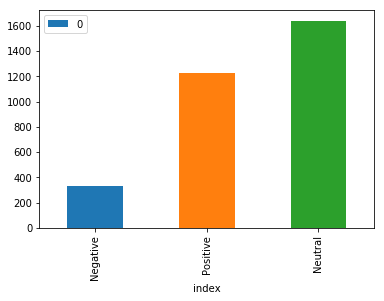

In [120]:
%matplotlib inline
sentiment_df.plot.bar("index", 0)